# DCS 640 Data Presentation & Visualization (DSC640-T302 2231-1)
## Bellevue University
## 3.2 Exercises: Line Charts and Step Charts
## Author: Jake Meyer
## Date: 01/14/2023

## Assignment Instructions:

Submit 1 tree map, 1 area chart, and 1 stacked area chart with Python

In [77]:
'''
Import the necessary libraries to complete Exercise 2.2.
'''
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import squarify

In [2]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)

numpy version: 1.20.3
pandas version: 1.3.4
seaborn version: 0.11.2
matplotlib version: 3.4.3


## Dataset Understanding

In [3]:
'''
Import the datasets.
Note: A copy of the CSV file was placed into the same directory as this notebook.
Utilize pd.read_csv() to read the file as a pandas data frame.
'''
df1 = pd.read_csv('expenditures.txt', sep = "\t")

In [4]:
'''
Use head() function to display the first 5 rows of data of df1.
'''
df1.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [5]:
'''
Understand the shape of the df1.
'''
print('There are {} rows and {} columns in the df1.'.format(df1.shape[0], df1.shape[1]))

There are 350 rows and 4 columns in the df1.


In [6]:
'''
Convert Year to Date Time for df1.
Comment this section out of the code. Originally tried plotting with Date Type, however had success leaving it as numeric.
'''
# df1['Year'] = pd.to_datetime(df1['Year'])

'\nConvert Year to Date Time for df1.\nComment this section out of the code. Originally tried plotting with Date Type, however had success leaving it as numeric.\n'

In [7]:
'''
Find the type of data within each df1 column initially.
'''
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         350 non-null    int64 
 1   category     350 non-null    object
 2   expenditure  350 non-null    int64 
 3   sex          350 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.1+ KB


In [8]:
'''
Understand if there are any missing values in df1.
'''
df1.isna().sum().sort_values(ascending = False)

year           0
category       0
expenditure    0
sex            0
dtype: int64

## Chart Creation from the Dataset. 

### Tree Map

In [9]:
'''
Aggregate the data for df1.
'''
grouped_df = df1.groupby('category')[['expenditure']].sum()
grouped_df

,expenditure
category,
Alcoholic Beverages,8424
Apparel,41833
Cash Contributions,27987
Education,14498
Entertainment,44273
Food,119297
Healthcare,47383
Housing,280256
Miscellaneous,18327


(0.0, 100.0, 0.0, 100.0)

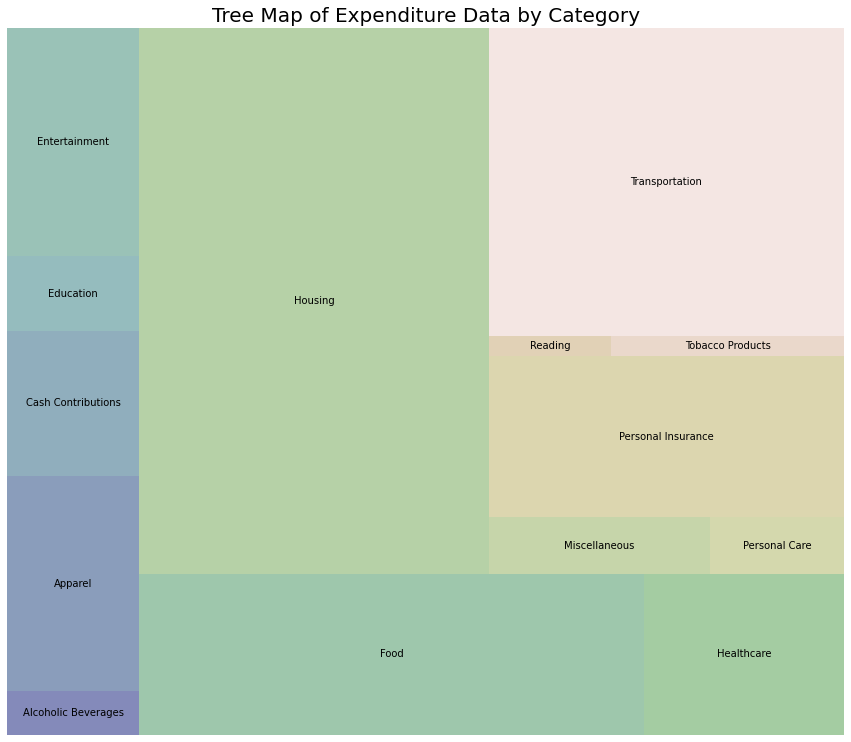

In [18]:
'''
Create a tree map using one of the expenditure dataset.
Use squarify to construct the plot.
'''
fig = plt.figure(figsize = (15,13))
squarify.plot(sizes = grouped_df.values, color=sns.color_palette("gist_earth", len(grouped_df)), 
              label = grouped_df.index, alpha =0.5)
plt.title('Tree Map of Expenditure Data by Category', fontsize = 20)
plt.axis("off")

### Area Chart

In [108]:
'''
Create a dataframe specifically for the area chart.
'''
df_area = df1[['year','category','expenditure']]
df_area.head()

,year,category,expenditure
0,2008,Food,6443
1,2008,Alcoholic Beverages,444
2,2008,Housing,17109
3,2008,Apparel,1801
4,2008,Transportation,8604


In [110]:
df_pivot = df_area.pivot(index='year', columns = 'category', values = 'expenditure')
df_pivot.head()

category,Alcoholic Beverages,Apparel,Cash Contributions,Education,Entertainment,Food,Healthcare,Housing,Miscellaneous,Personal Care,Personal Insurance,Reading,Tobacco Products,Transportation
year,,,,,,,,,,,,,,
1984,275,1319,706,303,1055,3290,1049,6674,451,289,1897,132,228,4304
1985,306,1420,805,321,1170,3477,1108,7087,529,303,2016,141,219,4587
1986,271,1346,746,314,1149,3448,1135,7292,522,303,2127,140,230,4842
1987,289,1446,741,337,1193,3664,1135,7569,562,330,2175,142,232,4600
1988,269,1489,693,342,1329,3748,1298,8079,578,334,2249,150,242,5093


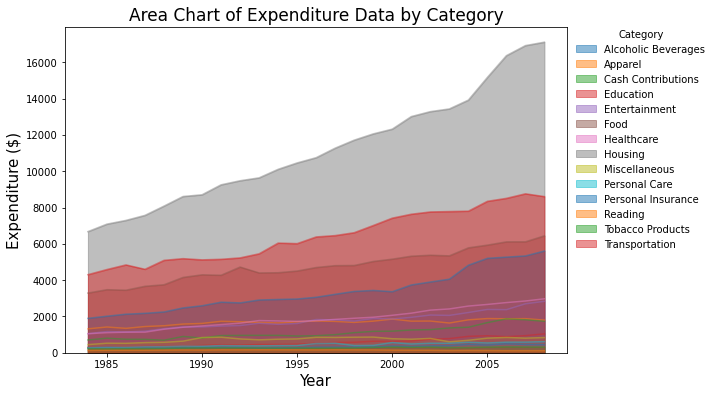

In [114]:
'''
Create an area chart using the expenditure.
Use matplotlib and pandas to construct the plot.
'''
ax = df_pivot.plot(kind='area', figsize=(9,6), stacked = False)
ax.set_xlabel("Year",fontsize=15)
ax.set_ylabel('Expenditure ($)', fontsize = 15)
ax.set_title('Area Chart of Expenditure Data by Category', fontsize = 17)
ax.legend(title='Category', bbox_to_anchor=(1,1.02),loc='upper left', frameon=False)

### Stacked Area Chart Using Plotly

In [92]:
'''
Create a stacked area chart of the expenditure data. 
Utilize plotly.express.
'''
fig = px.area(df_area, x = 'year', y= 'expenditure', color = 'category', labels={'expenditure':"Expenditure ($)",
                                                                                'year':'Year', 'category':"Category"},
             title = 'Stacked Area Chart of Expenditure Data by Category')
fig.show()

### Stacked Area Chart Using Pandas and Matplotlib

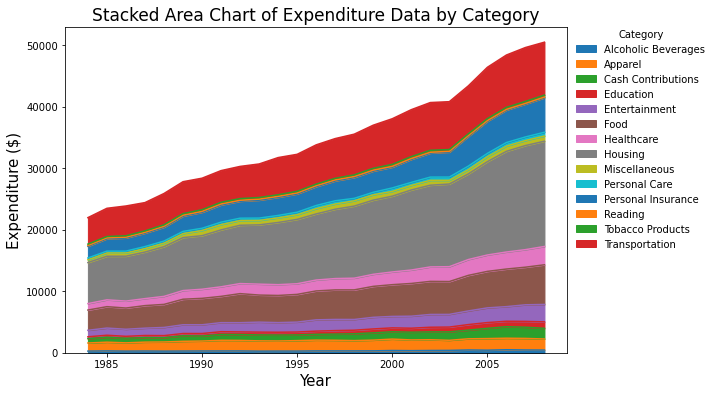

In [115]:
'''
Create stacked area chart using the expenditure.
Use matplotlib and pandas to construct the plot
'''
ax = df_pivot.plot(kind='area', figsize=(9,6), stacked = True)
ax.set_xlabel("Year",fontsize=15)
ax.set_ylabel('Expenditure ($)', fontsize = 15)
ax.set_title('Stacked Area Chart of Expenditure Data by Category', fontsize = 17)
ax.legend(title='Category', bbox_to_anchor=(1,1.02),loc='upper left', frameon=False)